<a href="https://colab.research.google.com/github/endar1y12/Pengolahan-Citra-Digital/blob/main/Pertemuan_6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1>0.Ambil Gambar

#Ambil gambar

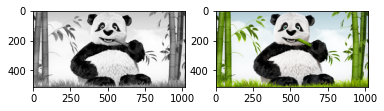

In [ ]:
from skimage import io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
url ="https://tinyjpg.com/images/social/website.jpg"

img = io.imread(url)

img_libgray = rgb2gray(img)
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.imshow(img_libgray,cmap=plt.cm.gray)
ax2.imshow(img)

#Translasi

<center><h1>1.Operasi Translasi


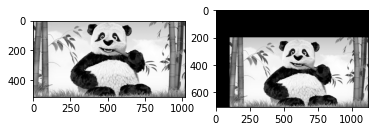

In [ ]:
import numpy as np

def translasi(img,xtrans,ytrans):
  img_q = np.zeros((img.shape[0]+ytrans,img.shape[1]+xtrans))
  for r in range (0,img.shape[0]):
    for c in range (0,img.shape[1]):
      img_q[r+ytrans,c+xtrans] = img[r,c]
  return img_q

imgnew=translasi(img_libgray,100,200)

fig,(ax1,ax2) = plt.subplots(1,2)
ax1.imshow(img_libgray,cmap=plt.cm.gray)
ax2.imshow(imgnew,cmap=plt.cm.gray)

<center><h1>2.Operasi Cropping


# Cropping

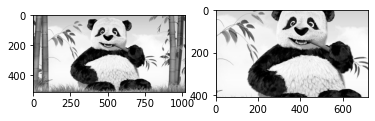

In [ ]:
def cropping(img,xL_diff,xR_diff,yB_diff,yT_diff):
  xL = xL_diff
  xR = img.shape[1] - xR_diff
  yB = yB_diff
  yT = img.shape[0] - yB_diff
  return img[yB:yT,xL:xR]

imgnew = cropping(img_libgray,100,200,50,300)
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.imshow(img_libgray,cmap=plt.cm.gray)
ax2.imshow(imgnew,cmap=plt.cm.gray)

<center><h1>3.Operasi Flipping

#Flipping

Flip Horizontal

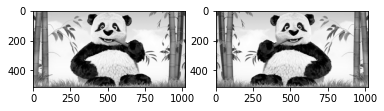

In [ ]:
def flip_horizontal(img):
  img_q = np.zeros((img.shape[0],img.shape[1]))
  for r in range (0,img.shape[0]):
    for c in range (0,img.shape[1]):
      img_q[r,img.shape[1]-c-1] = img[r,c]
  return img_q
imgnew = flip_horizontal(img_libgray)
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.imshow(img_libgray,cmap=plt.cm.gray)
ax2.imshow(imgnew,cmap=plt.cm.gray)

Flip Vertikal

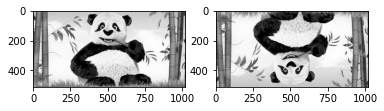

In [ ]:
def flip_vertical(img):
  img_q = np.zeros((img.shape[0],img.shape[1]))
  for r in range (0,img.shape[0]):
    for c in range (0,img.shape[1]):
      img_q[img.shape[0]-r-1,c] = img[r,c]
  return img_q

imgnew = flip_vertical(img_libgray)

fig,(ax1,ax2) = plt.subplots(1,2)
ax1.imshow(img_libgray,cmap=plt.cm.gray)
ax2.imshow(imgnew,cmap=plt.cm.gray)

<center><h1>4.Operasi Rotasi

# Rotasi

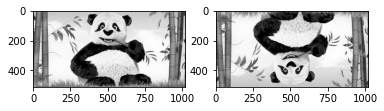

In [ ]:
import math
import numpy as np


def rotasi(img,degree):
  rad = math.radians(degree)
  center_r = math.floor(img.shape[0]/2)
  center_c = math.floor(img.shape[1]/2)
  img_q = np.zeros((2*img.shape[0],2*img.shape[1])) #membuat ruang 2 kali besar gambar

  for r in range(img.shape[0]):
    for c in range(img.shape[1]):
      '''
      x -> cos + sin
      y -> -sin + cos
      '''
      c_trans =(c- center_c)
      r_trans =(r- center_r)
      c_baru = math.floor(center_c*2 +c_trans*math.cos(rad)+r_trans*math.sin(rad))
      r_baru = math.floor(center_r*2+ r_trans*(-1)*math.cos(rad)+r_trans*math.sin(rad))
      img_q[r_baru,c_baru] = img[r,c]
  return img_q

img_new = rotasi(img_libgray,60)

fig,(ax1,ax2) = plt.subplots(1,2)
ax1.imshow(img_libgray,cmap=plt.cm.gray)
ax2.imshow(imgnew,cmap=plt.cm.gray)

<center><h1>5.Operasi Scalling

#Scalling

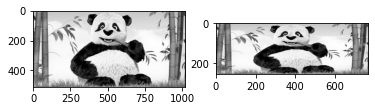

In [ ]:
import math
import numpy as np
def scaling(img,sx,sy):
  newr = math.floor(img.shape[0]*sy)
  newc = math.floor(img.shape[1]*sx)
  img_q = np.zeros((newr,newc))
  for r  in range (0,img.shape[0]):
    for c in range (0,img.shape[1]):
      img_q[math.floor(r*sy),math.floor(c*sx)] = img[r,c]
  return img_q

imgnew = scaling(img_libgray,0.75,0.5)

fig,(ax1,ax2) = plt.subplots(1,2)
ax1.imshow(img_libgray,cmap=plt.cm.gray)
ax2.imshow(imgnew,cmap=plt.cm.gray)

<center><h1>Konvolusi

#Konvolusi

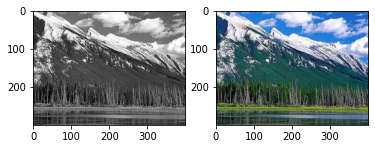

In [ ]:
from skimage import io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
url ="https://tutorialgratis.files.wordpress.com/2008/12/jpg-kualitas-tinggi.jpg?w=490"

img = io.imread(url)

img_libgray = rgb2gray(img)
fig,(ax1,ax2) = plt.subplots(1,2)
ax1.imshow(img_libgray,cmap=plt.cm.gray)
ax2.imshow(img)

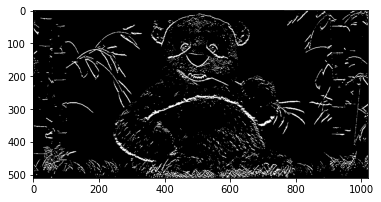

In [ ]:
import math
import numpy as np

def konvolusi(img,kernel):
  #jumlah padding
  pad_size = math.floor(kernel.shape[0]/2)
  #buat gambar baru
  img_padd = np.zeros((img.shape[0]+2*pad_size,img.shape[1]+2*pad_size))
  #gambar lama masuk kedalam gambar ke padding
  for r in range(img.shape[0]):
    for c in range (img.shape[1]):
      img_padd[r+pad_size,c+pad_size] = img[r,c]
      #apply konvolusi
  img_akhir = np.zeros((img.shape[0],img.shape[1]))
  for r in range(img_akhir.shape[0]):
     for c in range (img_akhir.shape[1]):
       for i in range(kernel.shape[0]):
         for j in range (kernel.shape[1]):
           img_akhir[r,c] +=kernel[i,j]*img_padd[r+i,c+j]
  return img_akhir

def clipping(img,max,min):
  img_c = np.zeros((img.shape[0],img.shape[1]))
  for r in range(img.shape[0]):
    for c in range (img.shape[1]):
      if img[r,c] >max:
        img_c[r,c] = max
      elif img[r,c] < min:
        img_c[r,c] = min
  return img_c

kernel = np.array([[-3,-10,-3],
                   [ 0,0,0],
                   [3,10,3]])

img1 = konvolusi(img_libgray,kernel)
img2 = clipping(img1,1,0)

plt.figure
plt.imshow(img_libgray,cmap=plt.cm.gray)
plt.figure
plt.imshow(img1,cmap=plt.cm.gray)
plt.figure
plt.imshow(img2,cmap=plt.cm.gray)


